In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.modeling import models, fitting
fitter = fitting.LinearLSQFitter()
from scipy.ndimage import median_filter
from pyraf import iraf


ERROR! Session/line number was not unique in database. History logging moved to new session 17
Unexpected exception formatting exception. Falling back to standard exception
Unexpected exception formatting exception. Falling back to standard exception
Unexpected exception formatting exception. Falling back to standard exception


In [27]:
fname = '../../DataReduction/FullSes10Oct12Vul_20241010T235310.fit'
vega='../../DataReduction/FullSept19Vega_20240919T234208.fit'

In [28]:
fits.getheader(fname)

SIMPLE  =                    T                                                  
BITPIX  =                  -32 / bits per data value                            
NAXIS   =                    1 / Number of data axes                            
NAXIS1  =               105480 / Length of data axis 1                          
EXPTIME =                  300 / [s] Total observation duration                 
DATE-OBS= '2024-10-10T23:50:40.837' / Date of observation start                 
BSCALE  =                    1 / linear factor in scaling equation              
BZERO   =                    0 / zero point in scaling equation                 
EXPOSURE=                  300 / [s] Total time of exposure                     
EXPTIME2= '1 x 300 s' / Exposure decomposition                                  
JD-OBS  =   2460594.4934999999 / JD start observation                           
JD-MID  =   2460594.4953000001 / JD mid observation                             
CRPIX1  =                   

In [29]:
b = fits.getval(fname,"CRVAL1")
m = fits.getval(fname,"CDELT1")


In [30]:
y = fits.getdata(fname)
y_new=y.tolist()
y_filt=median_filter(y_new,50)
x = m*np.arange(len(y))+b

mask_alpha=np.abs(6562.8-x)>40
mask_beta=np.abs(4861.33333333333-x)>40
mask_gamma=np.abs(4367.23-x)>50 #H_gamma está corrido
mask=mask_alpha&mask_beta&mask_gamma
np.arange(len(y))

array([     0,      1,      2, ..., 105477, 105478, 105479])

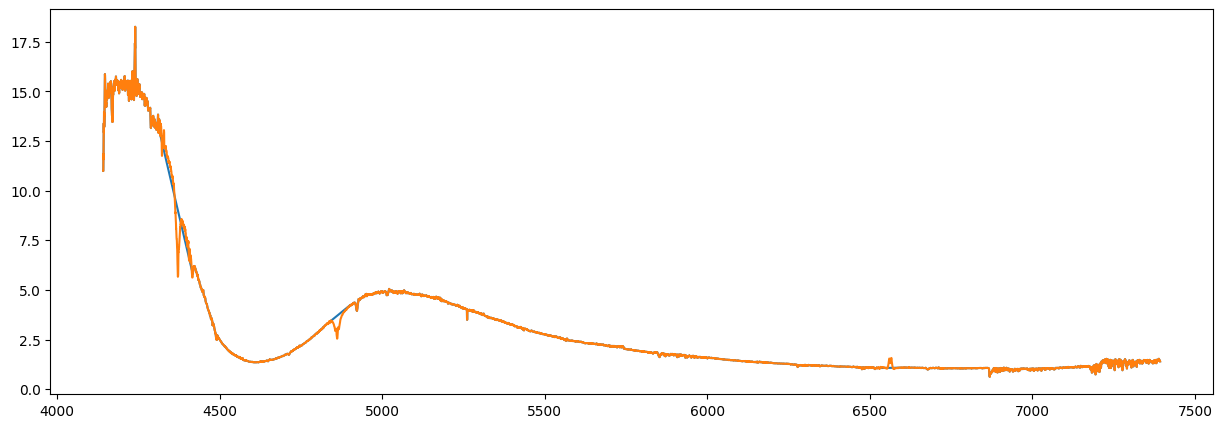

In [31]:
plt.figure(figsize=(15,5))
plt.plot(x[mask],y_filt[mask])

plt.plot(x,y_filt)

#plt.axvline(4367.23)

#plt.xlim(4000,4800)
#plt.ylim(0,5)


In [23]:
modelo = fitter(models.Chebyshev1D(25),x[mask],y_filt[mask])

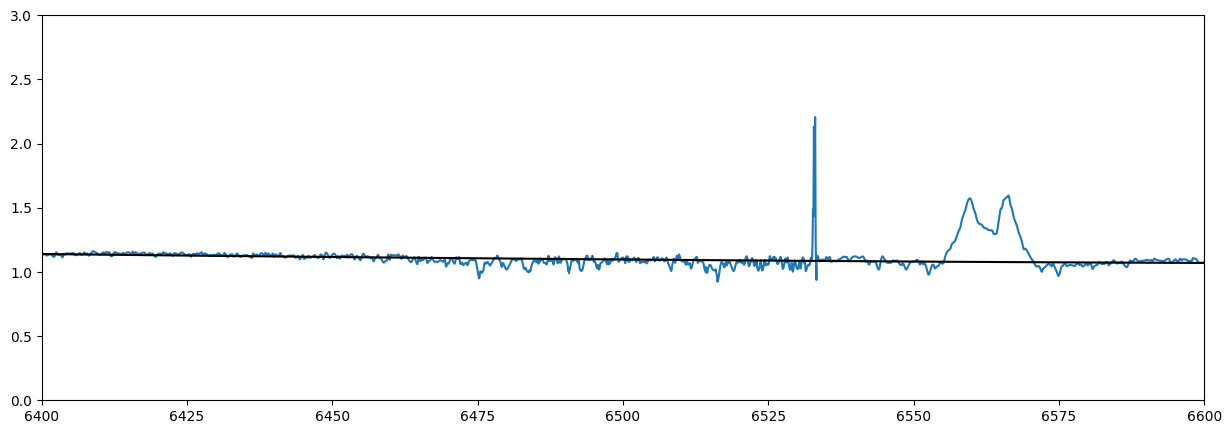

In [24]:
plt.figure(figsize=(15,5))
plt.plot(x,y)
#plt.plot(x,y_filt)
plt.plot(x,modelo(x),c='k')


plt.xlim(6400,6600)
plt.ylim(0,3)
plt.margins(x=0)

(0.0, 2.0)

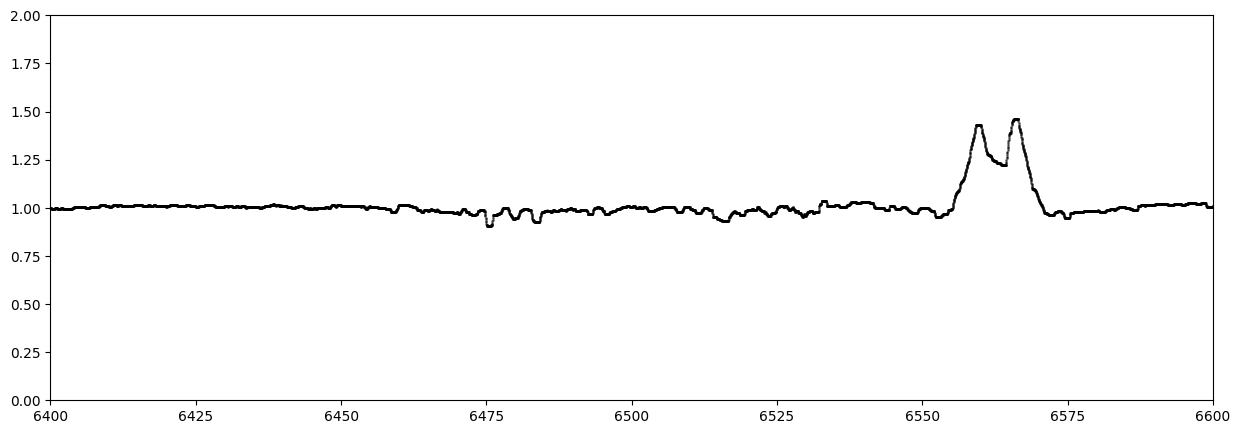

In [25]:
plt.figure(figsize=(15,5))
plt.scatter(x,y_filt/modelo(x),c='k',s=1,alpha=0.5)
plt.xlim(6400,6600)
plt.ylim(0,2)

### Trial of flux callibration

In [25]:
noao()
imred()
onedstds()

# Define your filenames and parameters
std_name = '12Vul'          # Name of your standard star
std_spec = vega    # Input: Your standard star spectrum
science_spec = fname # Input: Your science spectrum
sens_function = 'sens'         # Output: Sensitivity function
fluxcal_science = 'sci_flux'   # Output: Flux-calibrated science spectrum

std_airmass = 1.25
sci_airmass = 1.30

# 1. Create the sensitivity function from the standard star
iraf.standard(
    input=std_spec,
    output=sens_function,
    caldir='onedstds$oke1990/',
    star_name=std_name,
    extinction='onedstds$extinction.dat',
    airmass=std_airmass,
    interact=True  # Review the fit and reject bad points
)

# 2. Apply the sensitivity function to the science target
iraf.sensfunc(
    input=science_spec,
    output=fluxcal_science,
    sens=sens_function,
    airmass=sci_airmass,
    extinct=True
)

print("Flux calibration complete!")
print(f"Sensitivity function: {sens_function}")
print(f"Flux-calibrated science spectrum: {fluxcal_

Unexpected exception formatting exception. Falling back to standard exception


In [25]:
fluxcal_science

Unexpected exception formatting exception. Falling back to standard exceptionERROR! Session/line number was not unique in database. History logging moved to new session 13

Unexpected exception formatting exception. Falling back to standard exception
Unexpected exception formatting exception. Falling back to standard exception
